Все значения в 14-м столбце являются числами.
Все значения в 15-м столбце являются числами.


Избирателей всего: 47562702, Проголосовало: 32014110, Явка - 67.3%
Минимальная явка - 0.4934519735341091, Максимальная явка - 0.8025879682179342


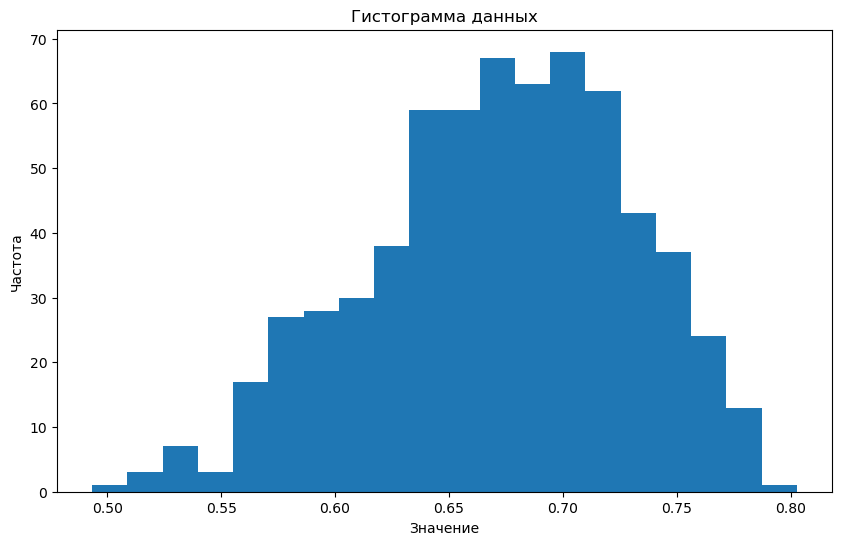

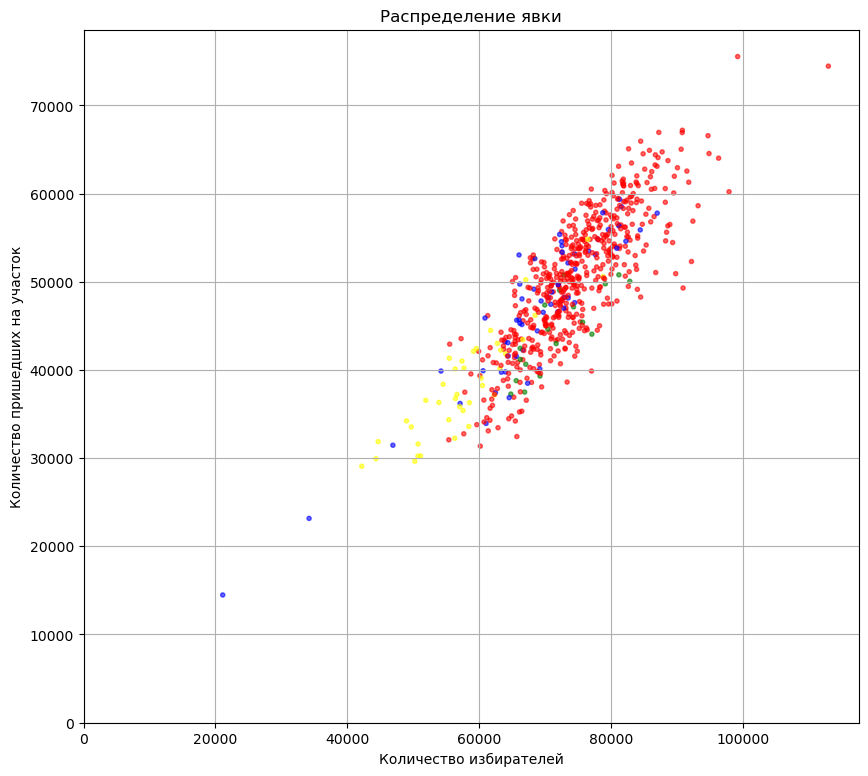

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np


elections = gpd.read_file('WPC_Dec_2019.geojson')

file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)

x_values = df.iloc[:, 14]  
y_values = df.iloc[:, 15] 
#country_name = df.iloc[:, 5]
#print(df)
df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'yellow', 'Scotland':'blue', 'Northern Ireland':'green'})

try:
    pd.to_numeric(x_values) 
    print("Все значения в 14-м столбце являются числами.")
except ValueError:
    print("В 14-м столбце есть выброс.")
try:
    pd.to_numeric(y_values) 
    print("Все значения в 15-м столбце являются числами.")
except ValueError:
    print("В 15-м столбце есть выброс.")
sum_x = sum(x_values)
sum_y = sum(y_values)
print(f"\n\nИзбирателей всего: {sum_x}, Проголосовало: {sum_y}, Явка - {100*sum_y/sum_x:.1f}%")
z_values = y_values/x_values
print(f"Минимальная явка - {np.min(z_values)}, Максимальная явка - {np.max(z_values)}")
plt.figure(figsize=(10, 6))
plt.hist(z_values, bins=20)  # Здесь bins - количество столбцов (бинов) на гистограмме
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма данных')
plt.show()



plt.figure(figsize=(10, 9)) # Устанавливаем размер графика (необязательно)
plt.scatter(x_values, y_values, c=df['Country name'],  s=9, alpha=0.6)  # Создаем диаграмму рассеяния
plt.title('Распределение явки')  # Устанавливаем заголовок графика
plt.xlabel('Количество избирателей')  # Устанавливаем подпись оси X
plt.ylabel('Количество пришедших на участок')  # Устанавливаем подпись оси Y
plt.xlim(0, )  # Устанавливаем минимальное значение по оси X
plt.ylim(0, ) 

plt.grid(True)  # Добавляем сетку на график

plt.show()  # Отображаем график

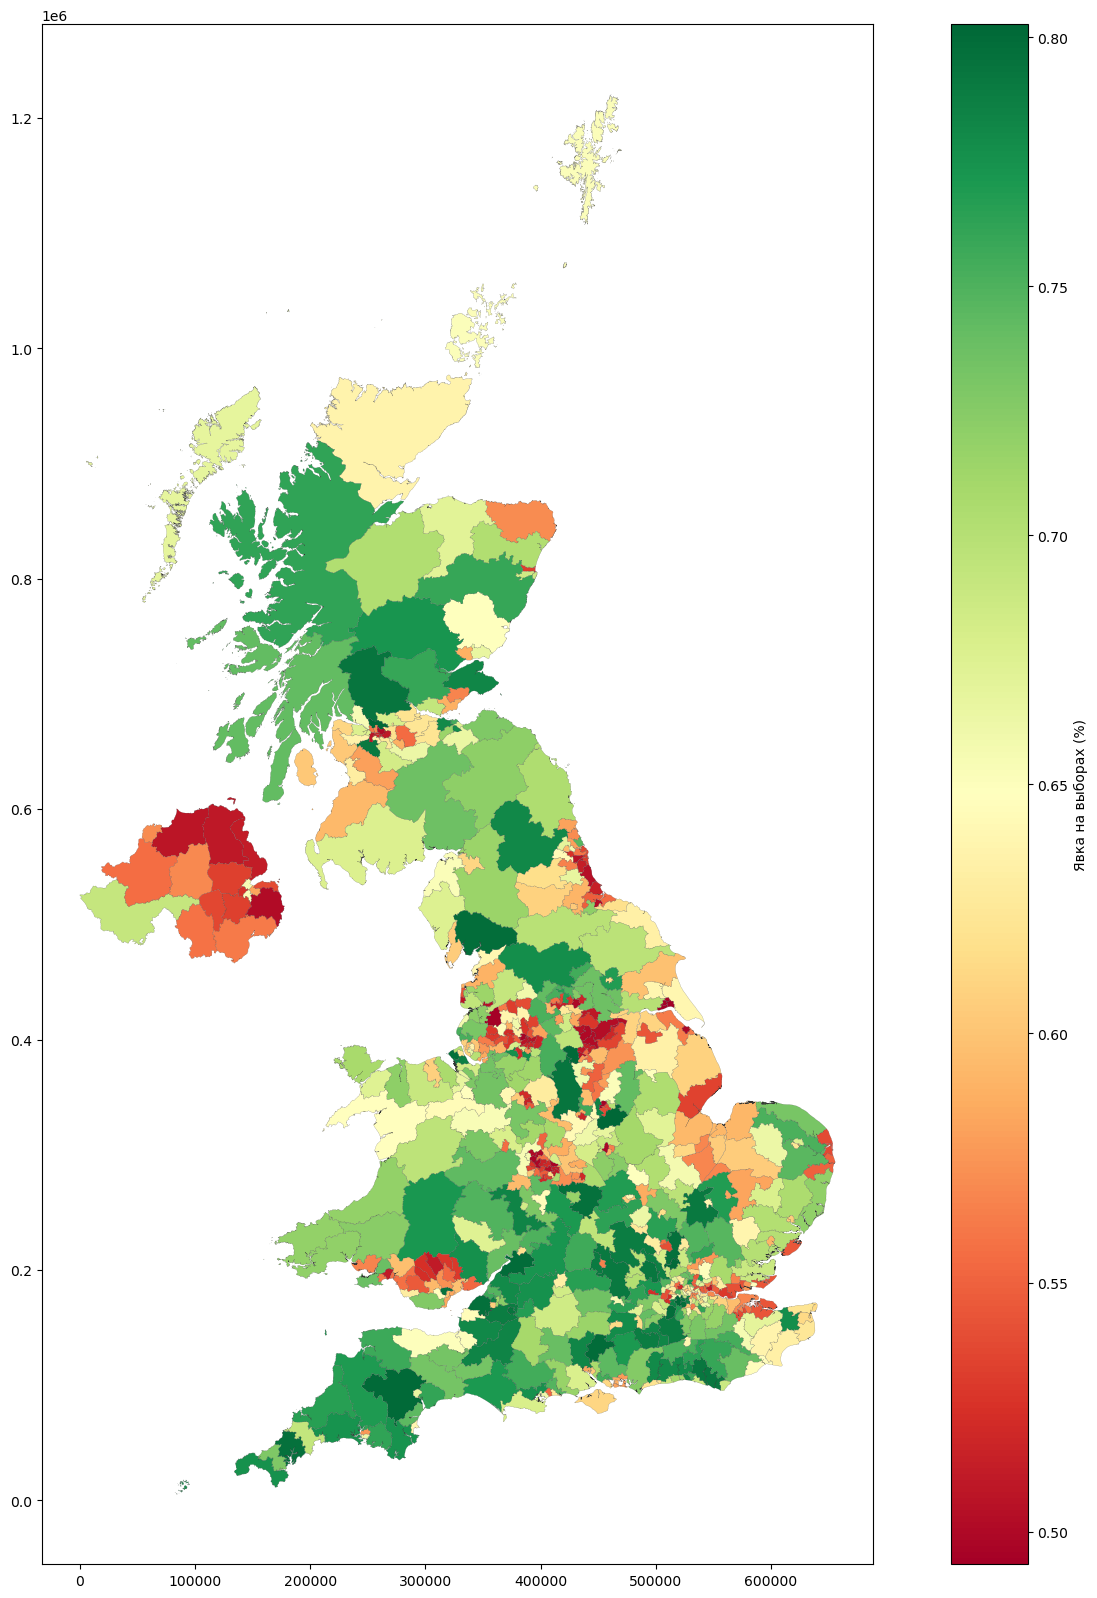

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

new_array = np.column_stack((df.iloc[:, 0], z_values))
turnout = pd.DataFrame(new_array, columns=['pcon19cd', 'turnout_percentage'])

merged_data = elections.merge(turnout, on='pcon19cd', how='left')
fig, ax = plt.subplots(figsize=(20, 20))

merged_data.plot(ax=ax, column='turnout_percentage', cmap='RdYlGn', linewidth=0.1, edgecolor='0.2',figsize=(20,20))


norm = Normalize(vmin=merged_data['turnout_percentage'].min(), vmax=merged_data['turnout_percentage'].max())
sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)

cbar.set_label('Явка на выборах (%)')
plt.show()



В Северной Ирландии Избирателей всего: 1293971, Проголосовало: 799035, Явка - 61.8%

В Уэльсе избирателей всего: 2319826, Проголосовало: 1544357, Явка - 66.6%

В Англии избирателей всего: 39895849, Проголосовало: 26911657, Явка - 67.5%

В Шотландии избирателей всего: 4053056, Проголосовало: 2759061, Явка - 68.1%


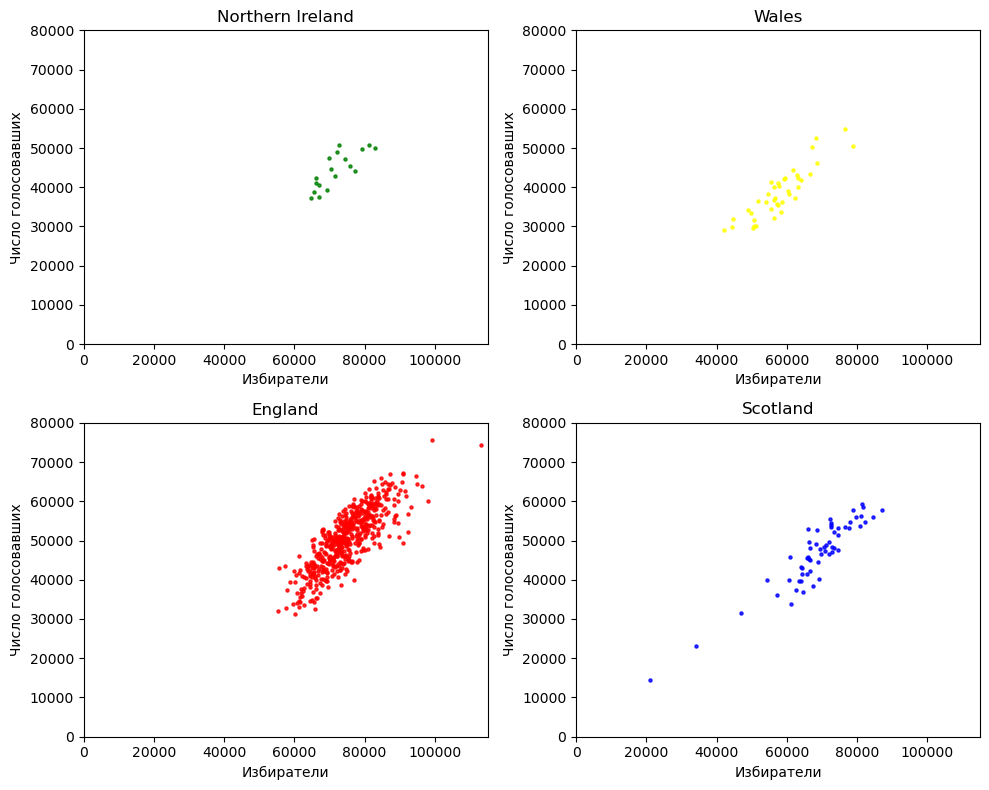

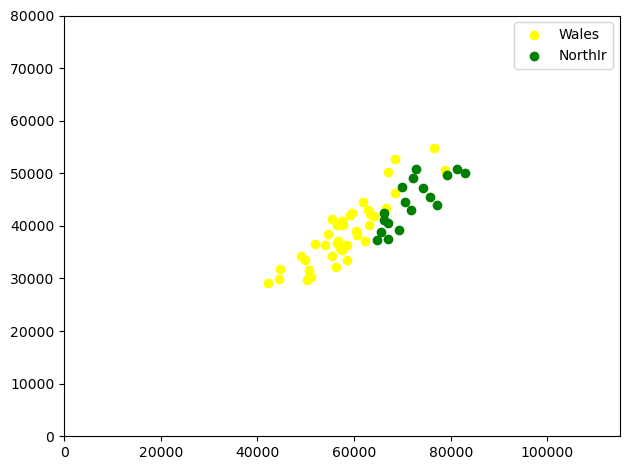

In [18]:
NorthIr = df.loc[df['Country name'] == 'green']
x_values = NorthIr.iloc[:, 14]  
y_values = NorthIr.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Северной Ирландии Избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

wales = df.loc[df['Country name'] == 'yellow']
x_values = wales.iloc[:, 14]  
y_values = wales.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Уэльсе избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

england = df.loc[df['Country name'] == 'red']
x_values = england.iloc[:, 14]  
y_values = england.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Англии избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

scotland = df.loc[df['Country name'] == 'blue']
x_values = scotland.iloc[:, 14]  
y_values = scotland.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Шотландии избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")


def plot_distribution(data_array, subplot_num, name, clr):
    x_values = data_array.iloc[:, 14]  
    y_values = data_array.iloc[:, 15]  

    plt.subplot(2, 2, subplot_num)
    plt.scatter(x_values, y_values, s=5, alpha=0.8, c = clr)  
    plt.xlim(0, 115000)  
    plt.ylim(0, 80000)
    plt.xlabel('Избиратели')
    plt.ylabel('Число голосовавших')
    plt.title(name)

plt.figure(figsize=(10, 8))


plot_distribution(england, 3, 'England', 'Red')
plot_distribution(scotland, 4, 'Scotland', 'Blue')
plot_distribution(wales, 2, 'Wales', 'Yellow')
plot_distribution(NorthIr, 1, 'Northern Ireland', 'Green')
plt.tight_layout()
plt.show()

plt.scatter(wales.iloc[:, 14], wales.iloc[:, 15], color='yellow', label='Wales')
plt.scatter(NorthIr.iloc[:, 14], NorthIr.iloc[:, 15], color='green', label='NorthIr')
plt.xlim(0, 115000)  
plt.ylim(0, 80000)
plt.legend()
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()





В Borough избирателей всего: 19218570, Проголосовало: 12496287, Явка - 65.0%

В Burgh избирателей всего: 1298206, Проголосовало: 852626, Явка - 65.7%

В County избирателей всего: 27045926, Проголосовало: 18665197, Явка - 69.0%


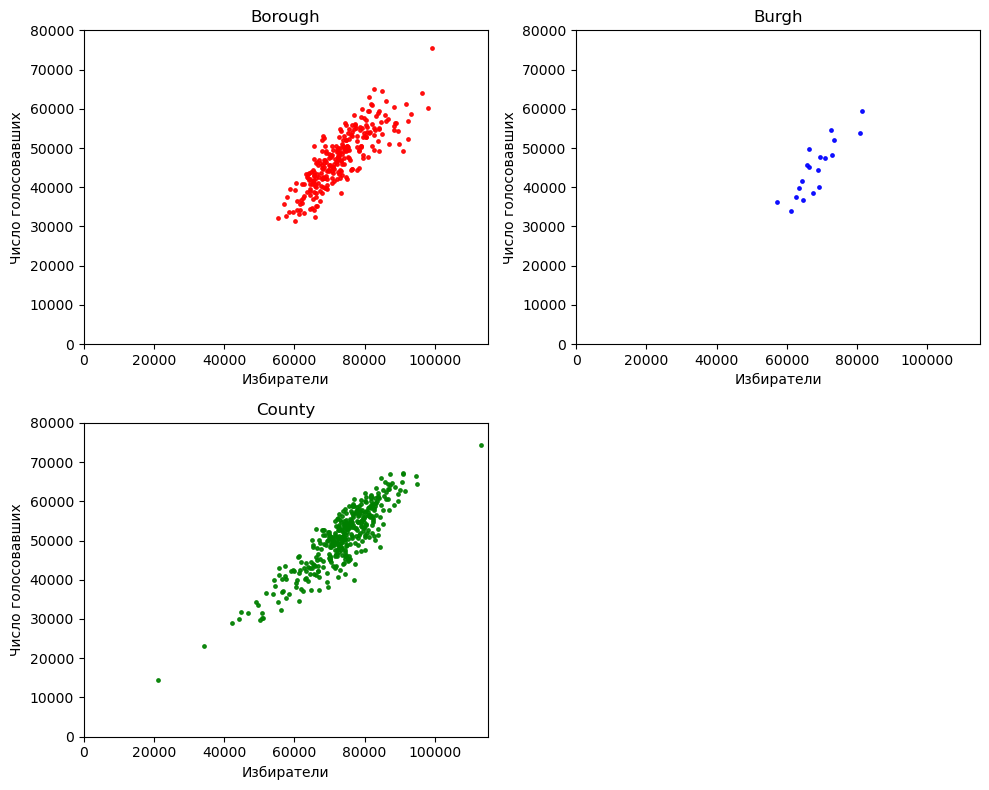

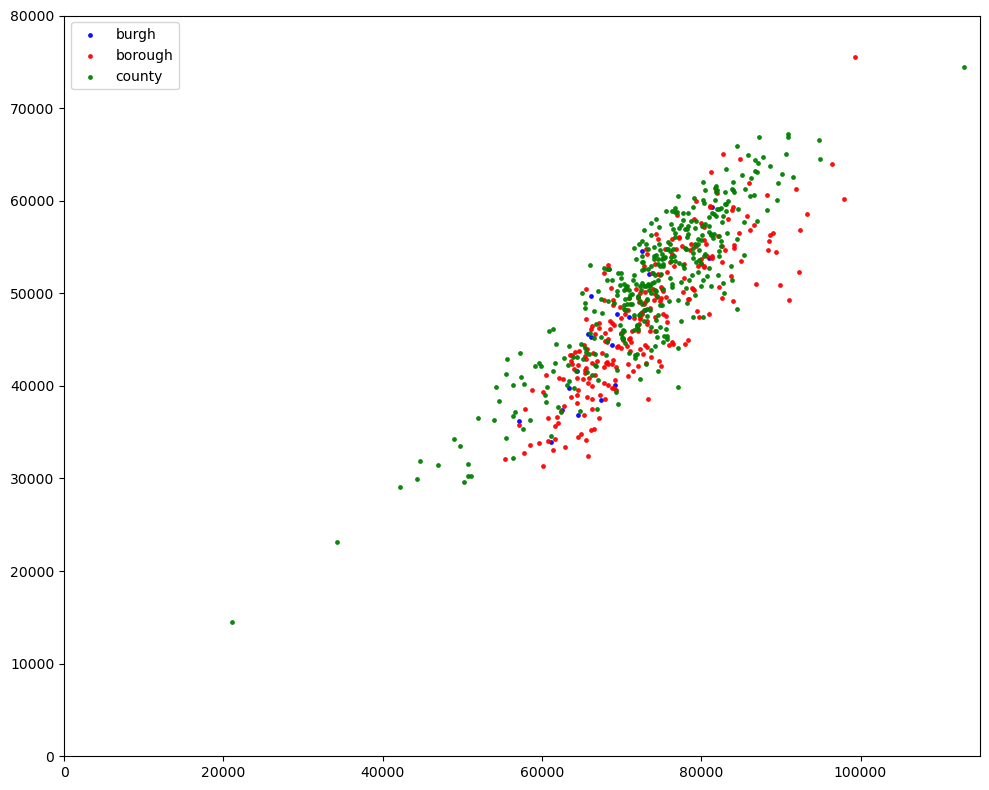

In [20]:
borough = df.loc[df['Constituency type'] == 'Borough']
x_values = borough.iloc[:, 14]  
y_values = borough.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Borough избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

burgh = df.loc[df['Constituency type'] == 'Burgh']
x_values = burgh.iloc[:, 14]  
y_values = burgh.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Burgh избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

county = df.loc[df['Constituency type'] == 'County']
x_values = county.iloc[:, 14]  
y_values = county.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ County избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

def plot_distribution(data_array, subplot_num, name, clr):

    x_values = data_array.iloc[:, 14] 
    y_values = data_array.iloc[:, 15]  
    plt.subplot(2, 2, subplot_num)
    plt.scatter(x_values, y_values, s=6, alpha=0.9, c = clr) 
    plt.xlim(0, 115000) 
    plt.ylim(0, 80000)
    plt.xlabel('Избиратели')
    plt.ylabel('Число голосовавших')
    plt.title(name)


plt.figure(figsize=(10, 8))
plot_distribution(burgh, 2, 'Burgh', 'Blue')
plot_distribution(borough, 1, 'Borough', 'Red')
plot_distribution(county, 3, 'County', 'Green')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(burgh.iloc[:, 14], burgh.iloc[:, 15], color='blue', label='burgh',s=6, alpha=0.9)
plt.scatter(borough.iloc[:, 14], borough.iloc[:, 15], color='red', label='borough',s=6, alpha=0.9)
plt.scatter(county.iloc[:, 14], county.iloc[:, 15], color='green', label='county',s=6, alpha=0.9)
plt.xlim(0, 115000)  
plt.ylim(0, 80000)
plt.legend()
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

55


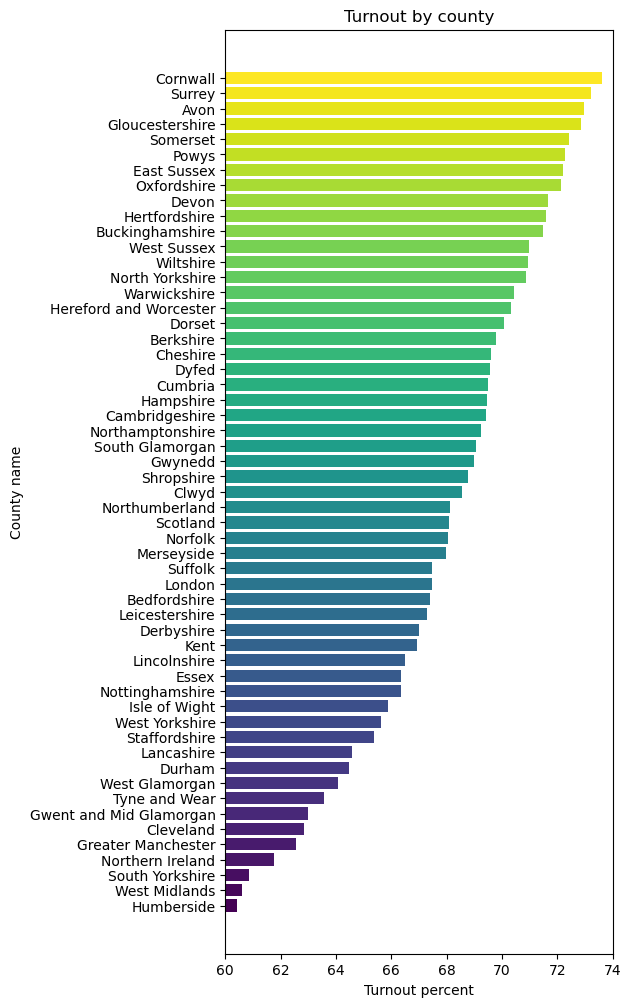

In [140]:
import pandas as pd

grouped = df.groupby(df.iloc[:, 3])

# Пример просмотра первых пяти столбцов каждой группы
turnout=[]
for name, group in grouped:
    x_values = group.iloc[:, 14]  
    y_values = group.iloc[:, 15]
    xsum = sum(x_values)
    ysum = sum(y_values)
   # print(f"\nВ {name} избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")
    turnout.append((100*ysum/xsum, name))
plt.figure(figsize=(5, 12))
sorted_turnout = sorted(turnout, key=lambda x: x[0])


# Создаем списки для значений осей X и Y
percentages = [t[0] for t in sorted_turnout]
names = [t[1] for t in sorted_turnout]
colors = plt.cm.viridis(np.linspace(0, 1, len(percentages)))

# Создаем горизонтальную столбчатую диаграмму
plt.barh(names, percentages, color=colors)
plt.xlim(60, 74)  # Например, диапазон от 0 до 100

# Добавляем название графика и метки осей
plt.title('Turnout by county')
plt.xlabel('Turnout percent')
plt.ylabel('County name')

# Показываем график
plt.show()

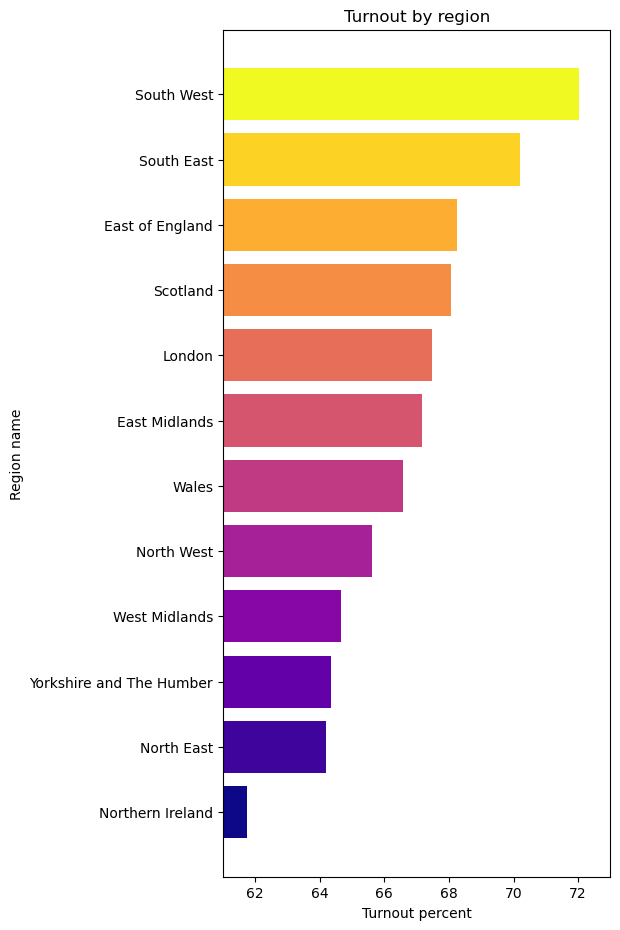

In [6]:
import pandas as pd

grouped = df.groupby(df.iloc[:, 4])

# Пример просмотра первых пяти столбцов каждой группы
turnout=[]
for name, group in grouped:
    x_values = group.iloc[:, 14]  
    y_values = group.iloc[:, 15]
    xsum = sum(x_values)
    ysum = sum(y_values)
    #print(f"\nВ {name} избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")
    turnout.append((100*ysum/xsum, name))
plt.figure(figsize=(5, 11))
sorted_turnout = sorted(turnout, key=lambda x: x[0])

# Создаем списки для значений осей X и Y
percentages = [t[0] for t in sorted_turnout]
names = [t[1] for t in sorted_turnout]

colors = plt.cm.plasma(np.linspace(0, 1, len(percentages)))

# Создаем горизонтальную столбчатую диаграмму
plt.barh(names, percentages, color=colors)
plt.xlim(61, 73)  # Например, диапазон от 0 до 100

# Добавляем название графика и метки осей
plt.title('Turnout by region')
plt.xlabel('Turnout percent')
plt.ylabel('Region name')

# Показываем график
plt.show()

Название первого столбца: con_code
Название седьмого столбца: age
Название восьмого столбца: con_number
Название девятого столбца: con_pc
      pcon19cd  young_percentage
0    E14000530          0.097235
1    E14000531          0.082504
2    E14000532          0.074890
3    E14000533          0.080158
4    E14000534          0.068028
..         ...               ...
645  W07000076          0.086903
646  W07000077          0.085985
647  W07000078          0.080735
648  W07000079          0.101561
649  W07000080          0.118039

[650 rows x 2 columns]


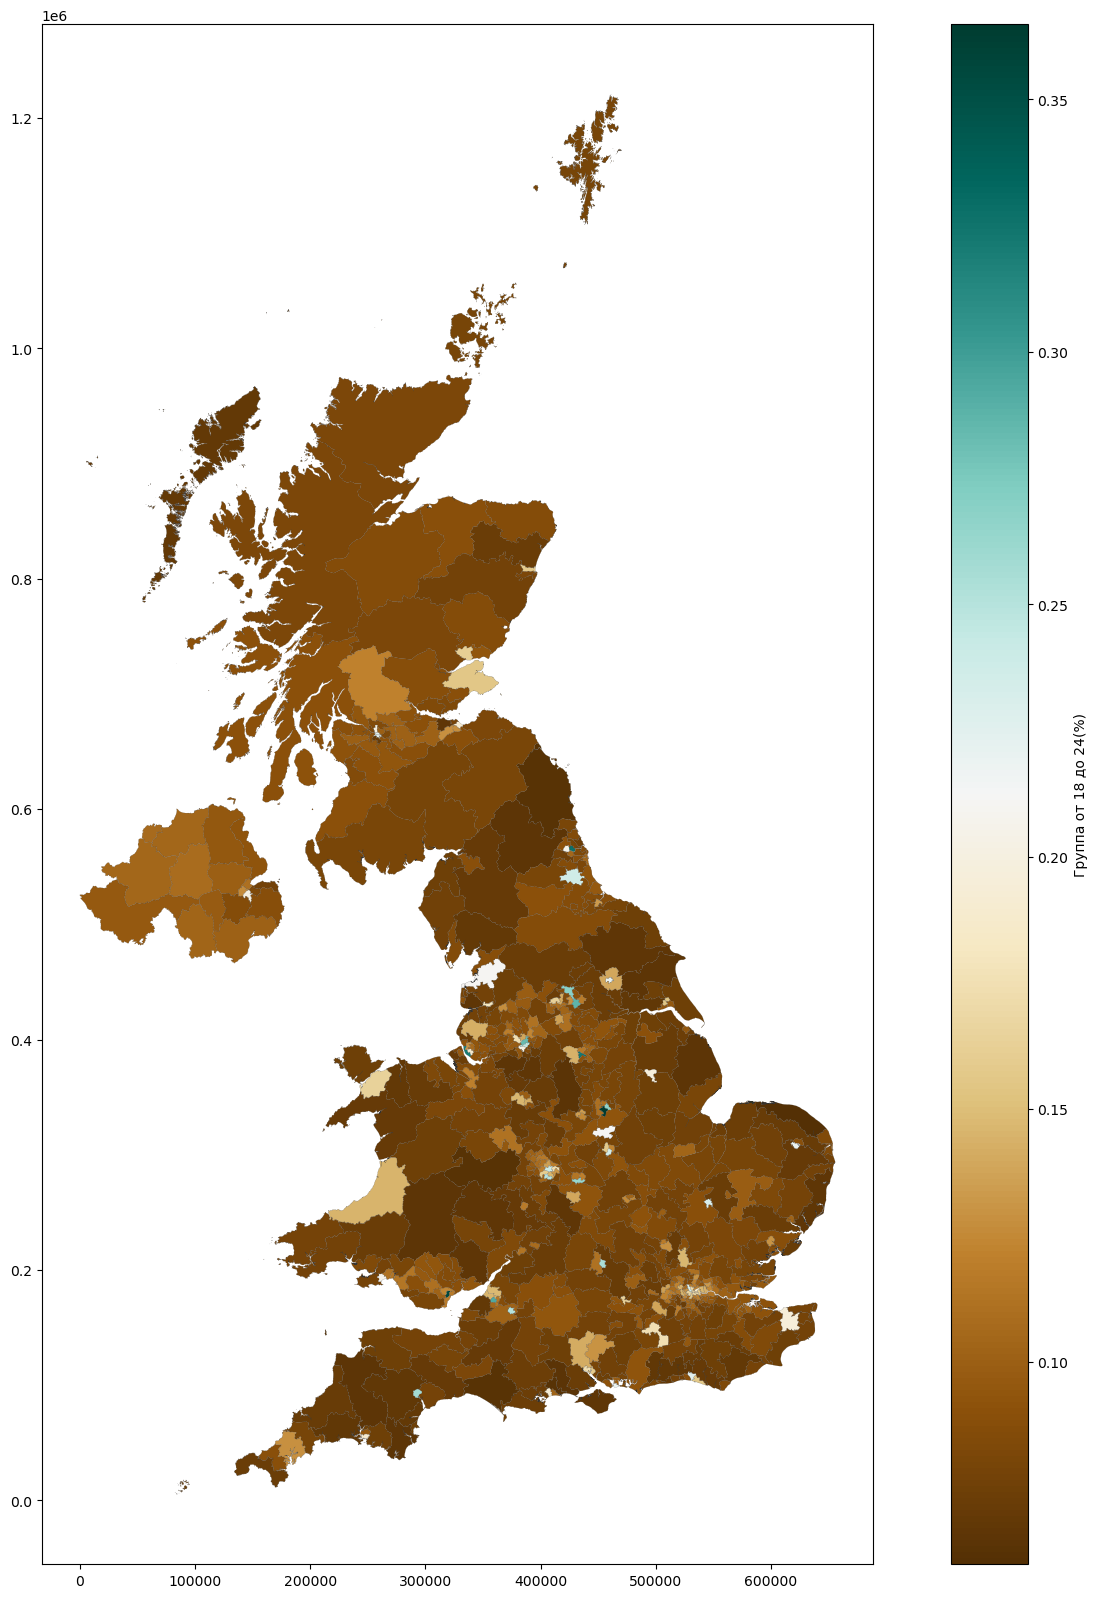

In [122]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import pandas as pd
df_second_sheet = pd.read_excel('population_by_age.xlsx', sheet_name=1)

column_names = df_second_sheet.columns
column_0 = column_names[0]
column_6 = column_names[6]
column_7 = column_names[7]
column_8 = column_names[8]
print("Название первого столбца:", column_0)
print("Название седьмого столбца:", column_6)
print("Название восьмого столбца:", column_7)
print("Название девятого столбца:", column_8)

f_df = df_second_sheet.loc[df_second_sheet['age'] == '0 to 17']

f_df = f_df.reset_index(drop=True)

f_df = f_df.iloc[:, [0, 8]]
#print(f_df)
filtered_df = df_second_sheet[df_second_sheet['age'].isin(['18 to 24'])]
new_df = filtered_df.groupby('con_code')['con_pc'].sum().reset_index()
#print(new_df)
new_df['con_pc'] = new_df['con_pc'] / (1.0 - f_df['con_pc'])

# Вывод результата
#print(new_df)
elections = gpd.read_file('WPC_Dec_2019.geojson')
new_df.columns = ['pcon19cd', 'young_percentage']
print(new_df)
merged_data = elections.merge(new_df, on='pcon19cd', how='left')
fig, ax = plt.subplots(figsize=(20, 20))
merged_data.plot(ax=ax, column='young_percentage', cmap='BrBG', linewidth=0.1, edgecolor='0.2',figsize=(20,20))

norm = Normalize(vmin=merged_data['young_percentage'].min(), vmax=merged_data['young_percentage'].max())
sm = cm.ScalarMappable(cmap='BrBG', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)

cbar.set_label('Группа от 18 до 24(%)')
plt.show()

        ONS ID ONS region ID        Constituency name  \
0    E14000533     E12000004             Amber Valley   
1    E14000534     E12000008  Arundel and South Downs   
2    E14000535     E12000004                 Ashfield   
3    E14000536     E12000008                  Ashford   
4    E14000538     E12000008                Aylesbury   
..         ...           ...                      ...   
363  W07000074     W92000004                   Ogmore   
364  W07000075     W92000004               Pontypridd   
365  W07000076     W92000004               Caerphilly   
366  W07000077     W92000004                   Islwyn   
367  W07000078     W92000004        Vale Of Glamorgan   

                 County name    Region name Country name Constituency type  \
0                 Derbyshire  East Midlands          red            County   
1                West Sussex     South East          red            County   
2            Nottinghamshire  East Midlands          red            County   
3  

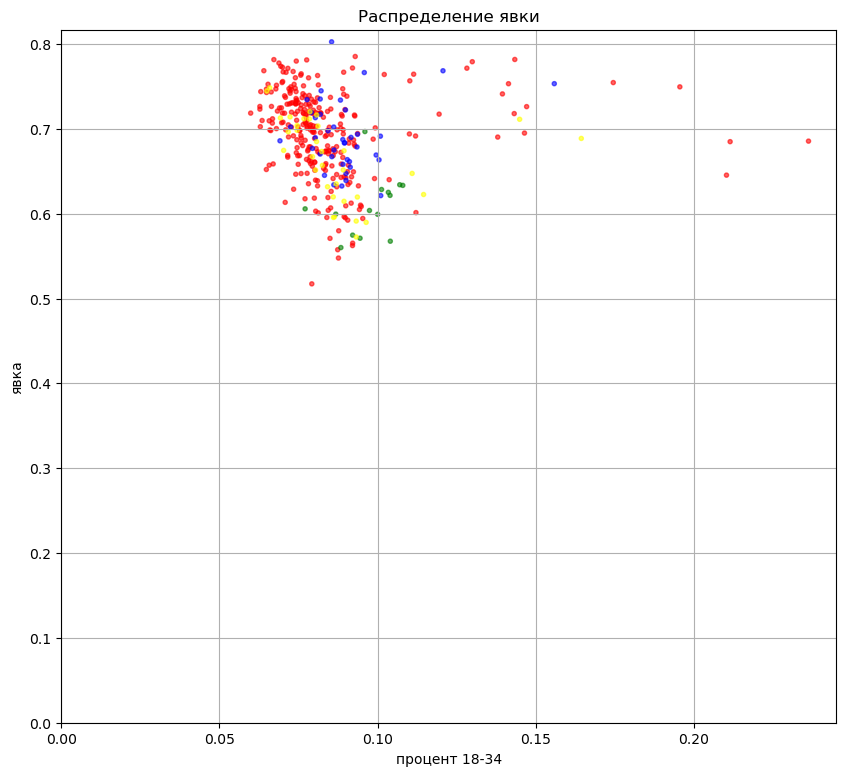

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)
df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'yellow', 'Scotland':'blue', 'Northern Ireland':'green'})
df = df.sort_values(by=df.columns[0])
new_df = new_df.sort_values(by=new_df.columns[0])
df = df[df['Constituency type'] == 'County']
#df = df[df['Constituency type'].isin(['Borough','Burgh'])]
#print (df)
#new_df = new_df[new_df['Колонка1'].isin(df1['Колонка1'])]
new_df = new_df[new_df.iloc[:, 0].isin(df.iloc[:, 0])]
df = df.reset_index(drop=True)
print(df)
print(new_df)
new_df = new_df.reset_index(drop=True)
result = new_df[new_df.iloc[:, 1] > 0.13]

result2 = df[df.iloc[:, 0].isin(result.iloc[:, 0])]
print(result2)
x_values = df.iloc[:, 14]  
y_values = df.iloc[:, 15] 
z_values = y_values/x_values
ass= new_df['young_percentage']

plt.figure(figsize=(10, 9)) 
plt.scatter(ass, z_values, s=9, c=df['Country name'], alpha=0.6)  
plt.title('Распределение явки')  
plt.xlabel('процент 18-34')  
plt.ylabel('явка')  
plt.xlim(0, )  
plt.ylim(0, ) 

plt.grid(True) 

plt.show()  
